<a href="https://colab.research.google.com/github/Ragervic/Machine-Learning-Projects/blob/main/BikesRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [252]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler

import copy
import seaborn as sns

DATASET:

Seoul Bike Sharing Demand [Dataset]. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5F62R.

In [253]:
dataset_cols = ["bike_count","hour","temp","humidity","wind","visibility","dew_pt_temp","radiation","rain","snow","function"]
df = pd.read_csv("SeoulBikeData.csv",encoding="cp1252").drop(["Date","Seasons","Holiday"],axis=1)

In [254]:
df.columns = dataset_cols
df["function"] = (df["function"] == "Yes").astype(int)

In [255]:
df= df[df["hour"]==12]
df=df.drop(["hour"],axis=1)

In [256]:
# df.head()

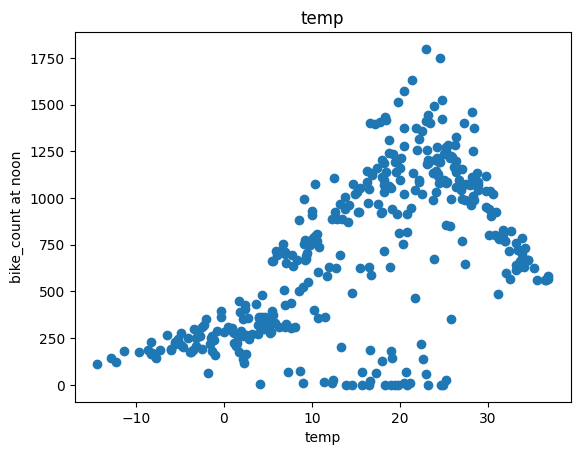

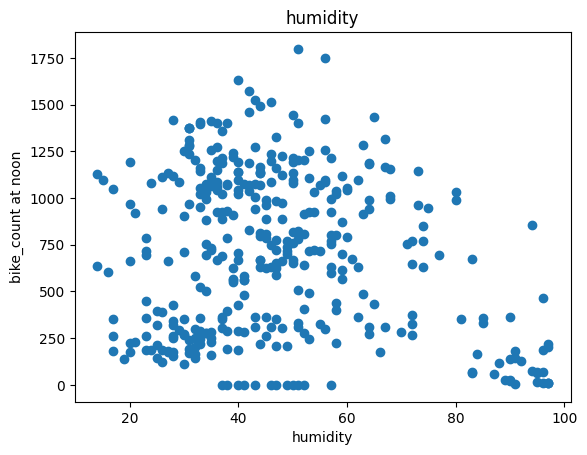

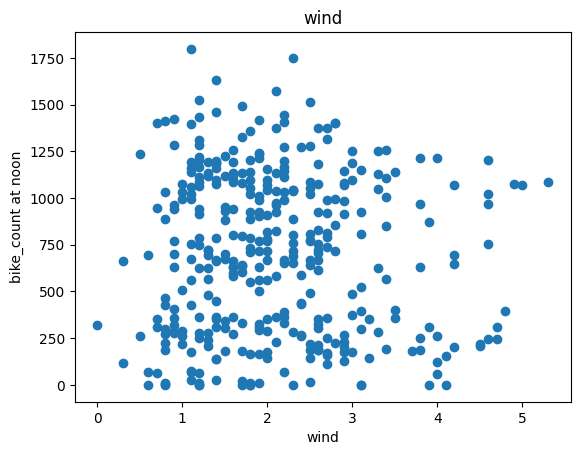

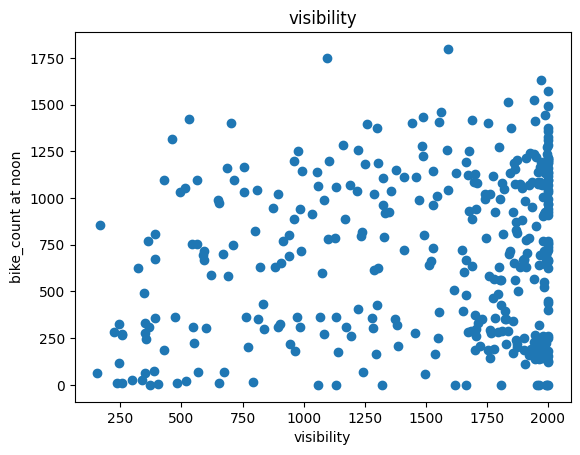

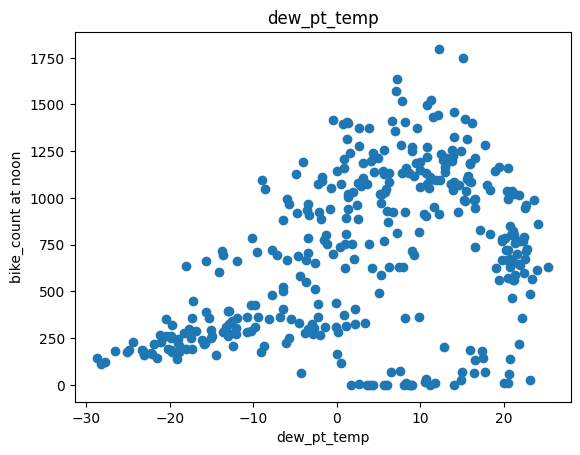

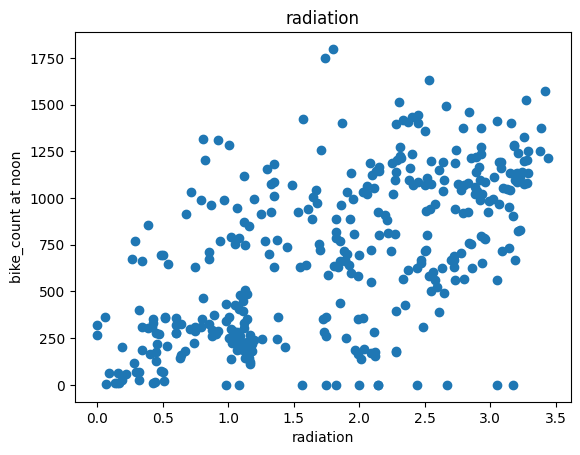

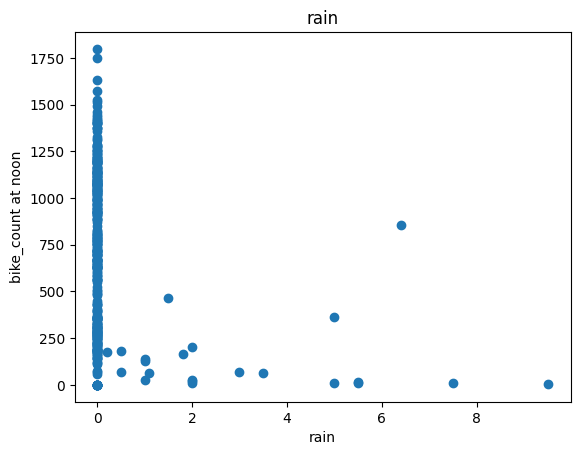

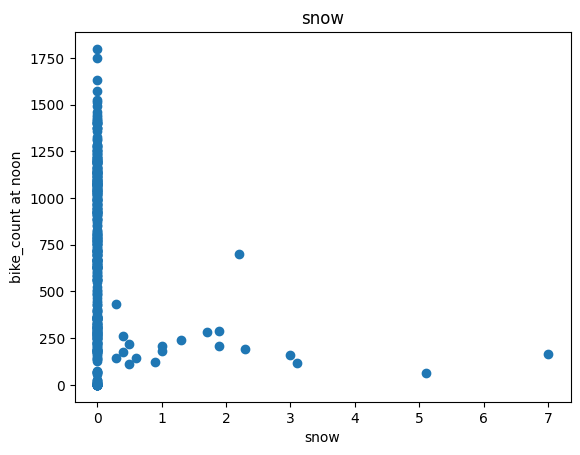

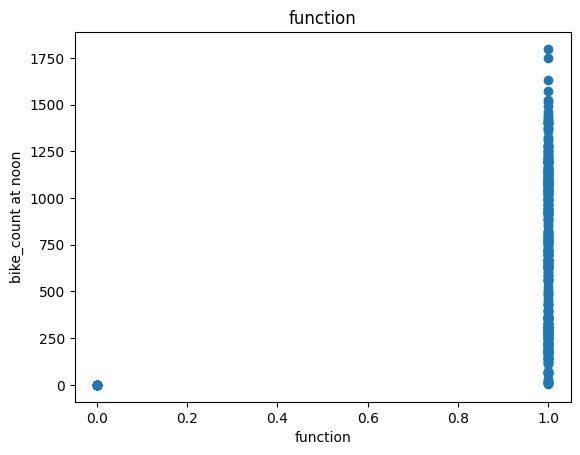

In [257]:
for label in df.columns[1:]:
  plt.scatter(df[label],df["bike_count"])
  plt.ylabel("bike_count at noon")
  plt.xlabel(label)
  plt.title(label)
  plt.show()

In [258]:
df = df.drop(["wind","visibility","function"],axis=1)

In [259]:
train, valid, test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [260]:
def get_xy(dataframe, y_label,x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    x =dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      x = dataframe[x_labels[0]].values.reshape(-1,1)
    else:
      x= dataframe[x_labels].values

  y=dataframe[y_label].values.reshape(-1,1)
  data = np.hstack((x,y))
  return data, x, y


#Datasets
Splitting the dataframe into train, valid, and test datasets of a single feature ie. temperature

In [261]:
_,x_train_temp,y_train_temp = get_xy(train,"bike_count",x_labels=["temp"])
_,x_valid_temp,y_valid_temp = get_xy(valid,"bike_count",x_labels=["temp"])
_,x_test_temp,y_test_temp = get_xy(test,"bike_count",x_labels=["temp"])


In [262]:
x_train_temp

array([[  2.2],
       [ 15.7],
       [ 20.5],
       [ 19.1],
       [ -6. ],
       [  5.5],
       [ 16.7],
       [ 10.3],
       [  8.1],
       [  2.3],
       [ 17.5],
       [ 13.7],
       [ 17.4],
       [ 36.6],
       [ 16.8],
       [ 16.5],
       [ 24.1],
       [ 30.9],
       [ 16.5],
       [ 28.2],
       [ 32.4],
       [  4. ],
       [  8.3],
       [ 27.4],
       [  1.5],
       [ 20.3],
       [ 21.4],
       [ 18.2],
       [ 27.5],
       [ 24.8],
       [ 25.8],
       [ 25.7],
       [ 18.4],
       [ 23.9],
       [ 19.5],
       [ 25.9],
       [-12.2],
       [  2.5],
       [ 24.5],
       [ 31.9],
       [ 19. ],
       [ 32.5],
       [ 33.2],
       [  5.4],
       [ 22.2],
       [ -2.7],
       [ 18.2],
       [ 18.2],
       [ 22.9],
       [ 15.1],
       [ 35.5],
       [ -0.3],
       [ -3.4],
       [ 18.8],
       [ -1.1],
       [  4.1],
       [ 24.2],
       [ 10.4],
       [ -2.5],
       [ 20.5],
       [ 13.9],
       [ 22.1],
       [

#Creating a regressor model that uses the simple linear regression algorithm.

In [263]:
# Creating an instance of a simple regressor
temp_reg = LinearRegression()
temp_reg.fit(x_train_temp,y_train_temp)

LinearRegression()

In [264]:
# Prints the coefficient and the y intercept of the temp regressor
# print(temp_reg.coef_,temp_reg.intercept_)

# Score calculates the correlation between two things
temp_reg.score(x_test_temp,y_test_temp)

0.36484209588454164

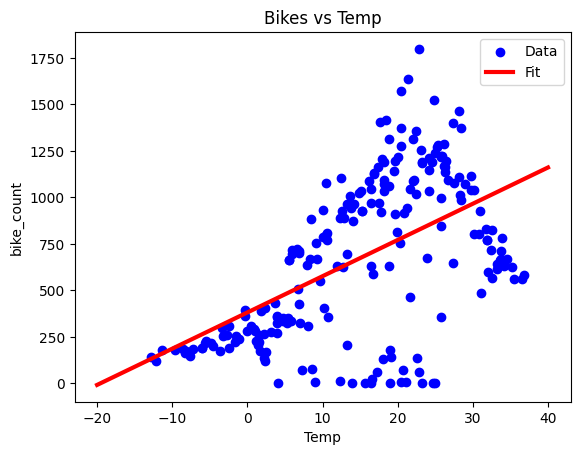

In [265]:
plt.scatter(x_train_temp,y_train_temp,label="Data",color="Blue")
x = tf.linspace(-20,40,100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1,1)),label="Fit",color="Red",linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.xlabel("Temp")
plt.ylabel("bike_count")
plt.show()

 # Multiple Linear Regression

In [266]:
train, valid, test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])
_,x_train_all,y_train_all = get_xy(train,"bike_count",x_labels=df.columns[1:])
_,x_valid_all,y_valid_all = get_xy(valid,"bike_count",x_labels=df.columns[1:])
_,x_test_all,y_test_all = get_xy(test,"bike_count",x_labels=df.columns[1:])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [267]:
all_reg = LinearRegression()
all_reg.fit(x_train_all,y_train_all)

LinearRegression()

In [268]:
all_reg.score(x_test_all,y_test_all)

0.4455704801238688

#Regression with Neural Networks


In [269]:
def plot_loss(history):
  plt.plot(history.history['loss'],label='loss')
  plt.plot(history.history['val_loss'],label='val_loss')
  plt.xlabel("Epochs")
  plt.ylabel("MSE")
  plt.legend()
  plt.grid(True)
  plt.show()

In [270]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,),axis=None)
temp_normalizer.adapt(x_train_temp.reshape(-1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [271]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [272]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),loss='mean_squared_error')

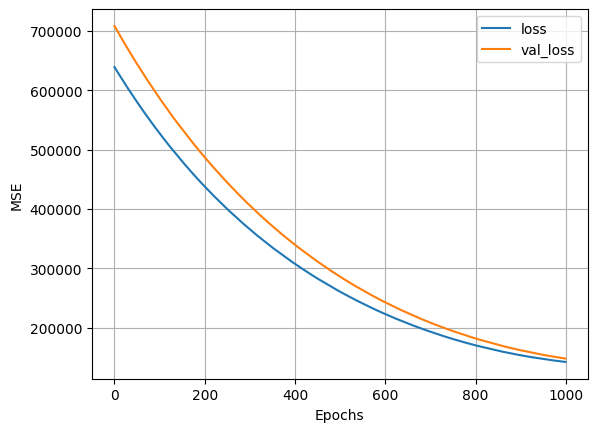

In [273]:
history = temp_nn_model.fit(
    x_train_temp.reshape(-1), y_train_temp,
    verbose=0,
    epochs=1000,
    validation_data=(x_valid_temp,y_valid_temp)
)
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


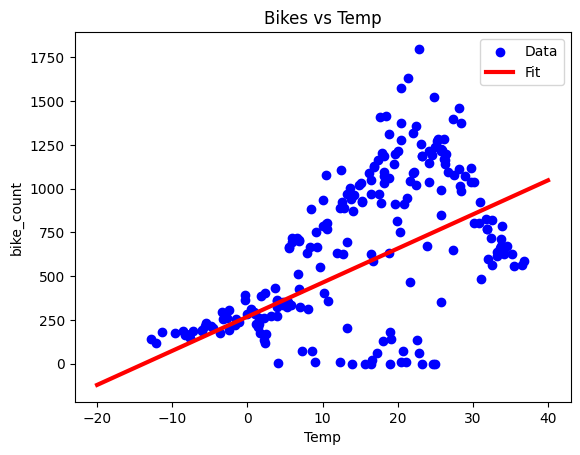

In [274]:
# Scatter plot for the temp_nn_model on the temperature feature
plt.scatter(x_train_temp,y_train_temp,label="Data",color="Blue")
x = tf.linspace(-20,40,100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1,1)),label="Fit",color="Red",linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.xlabel("Temp")
plt.ylabel("bike_count")
plt.show()

#Neural network

In [275]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,),axis=None)
temp_normalizer.adapt(x_train_temp.reshape(-1))
nn_model =  tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1),
])
nn_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

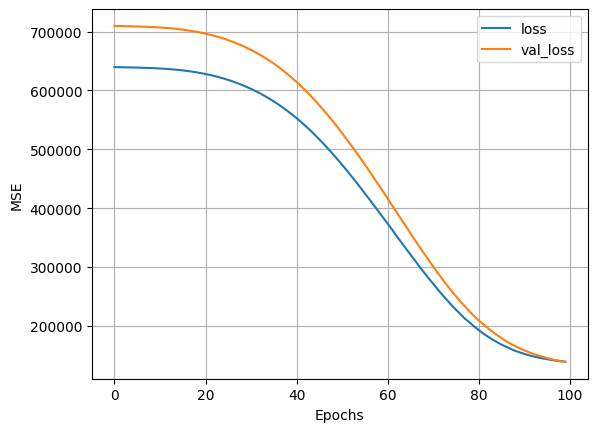

In [276]:
history = nn_model.fit(
    x_train_temp,y_train_temp,
    validation_data=(x_valid_temp,y_valid_temp),
    verbose=0,epochs=100
)
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


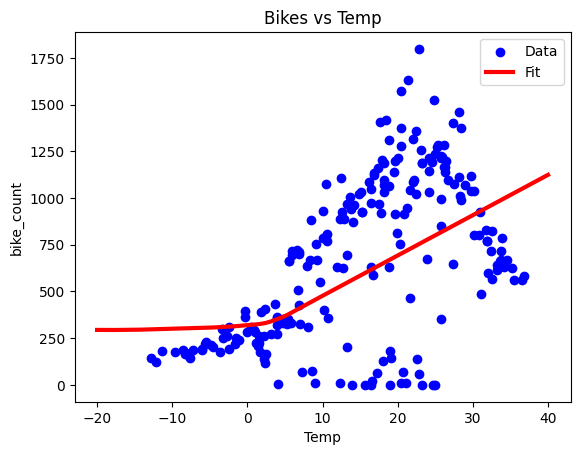

In [277]:
# Scatter plot for the nn_model on the temperature feature
plt.scatter(x_train_temp,y_train_temp,label="Data",color="Blue")
x = tf.linspace(-20,40,100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1,1)),label="Fit",color="Red",linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.xlabel("Temp")
plt.ylabel("bike_count")
plt.show()

In [281]:
# All features
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,),axis=-1)
all_normalizer.adapt(x_train_all)

nn_model =  tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1),
])
nn_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


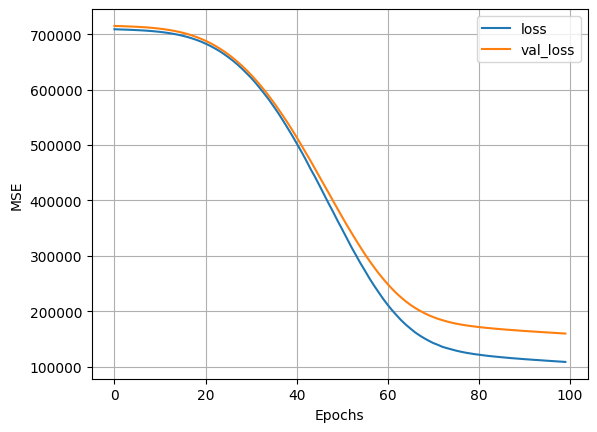

In [282]:
history = nn_model.fit(
    x_train_all,y_train_all,
    validation_data=(x_valid_all,y_valid_all),
    verbose=0,epochs=100
)
plot_loss(history)

In [283]:
# MSE calculation of both linear reg and nn
y_pred_lr = all_reg.predict(x_test_all)
y_pred_nn = nn_model.predict(x_test_all)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [288]:
def MSE(y_pred,y_real):
  return (np.square(y_pred-y_real)).mean()

In [289]:
MSE(y_pred_nn,y_test_all)


112687.13760448791

In [290]:
MSE(y_pred_lr,y_test_all)


89612.92895661434

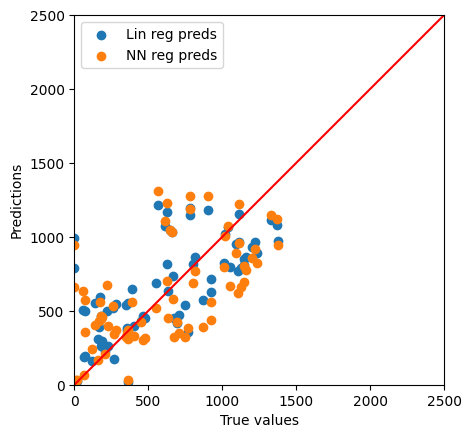

In [292]:
ax = plt.axes(aspect="equal")
plt.scatter(y_test_all,y_pred_lr,label="Lin reg preds")
plt.scatter(y_test_all,y_pred_nn,label="NN reg preds")
plt.xlabel("True values")
plt.ylabel("Predictions")
lims = [0,2500]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_=plt.plot(lims,lims,c="red")